### Load the dataset

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.6 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


---

### Calulate and count the number of annotations in the dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.rcParams['figure.figsize'] = 15,5 # set the size of graph

In [4]:
categories = [category['name'].split('.')[-1] for category in nusc.category]

In [5]:
annotations_in_numpy_array = np.array(nusc.sample_annotation)

In [6]:
def actual_name(name):
    return name.split('.')[-1]
# len(annotations_in_numpy_array)

In [7]:
count_categories_in_annots = []
for i in range(0, len(categories)):
    count_categories_in_annots.append(0)
    for j in range(0, len(annotations_in_numpy_array)):
        if (actual_name(annotations_in_numpy_array[j]['category_name']) == categories[i]):
            count_categories_in_annots[i] += 1

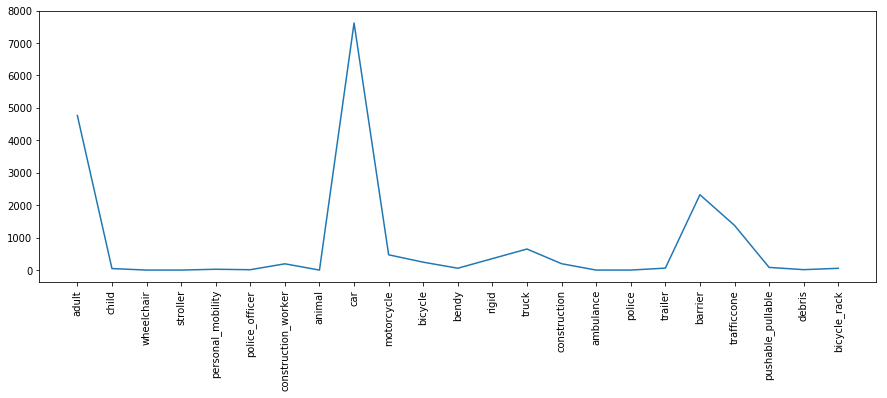

In [8]:
plt.plot(count_categories_in_annots)
plt.xticks(list(range(0,23)), categories, rotation='vertical')
plt.yticks()
plt.show()

---

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [13]:
# Count How many annotations are doing what
movables = ['adult', 'child', 'wheelchair', 'personal_mobility', 'police_officer', 'construction_worker',
            'animal', 'car', 'motorcycle', 'bicycle', 'truck', 'ambulance', 'police', 'trailer']
# movables

In [14]:
annotations_in_numpy_array = np.array(nusc.sample_annotation)

In [15]:
def actual_name(name):
    return name.split('.')[-1]

In [16]:
# count the parked annotations
attributes = ['moving', 'stopped', 'parked', 'with_rider', 'without_rider', 'sitting_lying_down', 'standing']
attributes_dict = {'moving': 0, 'stopped': 1, 'parked': 2, 'with_rider': 3, 'without_rider': 4, 'sitting_lying_down': 5, 'standing': 6}

In [17]:
def plot_attributes(attr='moving'):
    annotations_attribute = []
    for i in range(0, len(movables)):
        annotations_attribute.append(0)
        for j in range(0, len(nusc.sample_annotation)):
            if (movables[i] == actual_name(nusc.sample_annotation[j]['category_name']) and nusc.get('attribute', nusc.sample_annotation[j]['attribute_tokens'][-1])['name'].split('.')[-1] == attr):
                annotations_attribute[i] += 1    
    return annotations_attribute

In [19]:
attributes_matrix = np.array([plot_attributes(attr=i) for i in attributes])

In [20]:
# find total for each column
# https://www.geeksforgeeks.org/matrix-manipulation-python/
tot = np.sum(attributes_matrix, axis=0)

# create a totals matrix
totals_matrix = np.array([tot for i in attributes])

# find the percetages
percentage_matrix = np.matrix.round((attributes_matrix / totals_matrix) * 100, 2)

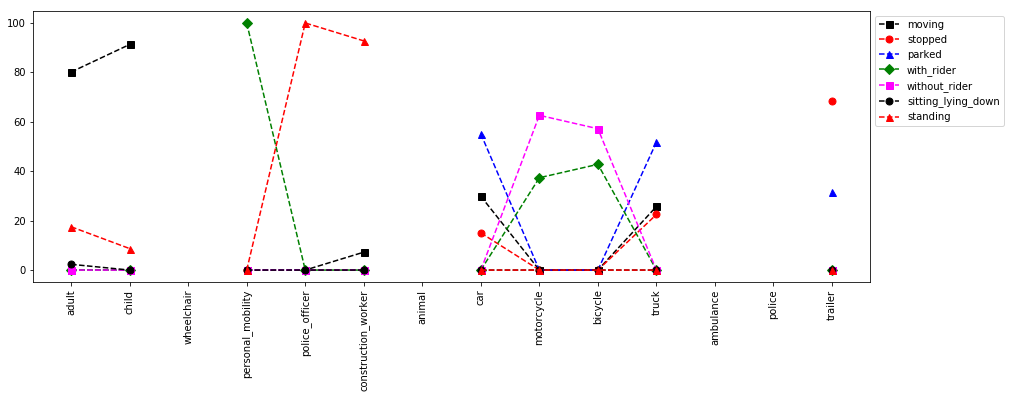

In [21]:
Color = {'moving' : 'Black', 'stopped' : 'Red', 'parked' : 'Blue','with_rider' : 'Green',
         'without_rider' : 'Magenta', 'sitting_lying_down' : 'Black', 'standing' : 'Red'}
Mrk = {'moving' : 's', 'stopped' : 'o', 'parked' : '^', 'with_rider' : 'D', 
       'without_rider' : 's', 'sitting_lying_down' : 'o', 'standing' : '^'}
for i in attributes_dict:
    plt.plot(percentage_matrix[attributes_dict[i]], c=Color[i], ls='--', marker=Mrk[i], ms=7, label=i)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(0, len(movables))), movables , rotation='vertical')
plt.show()

---

In [54]:
sample_token = nusc.sample[60]['token']
category_name = nusc.category[2]['name']
sample_annotation_token = nusc.sample_annotation[3]['token']

# here we have the raw unlabled data
# nusc.sample[1]

nusc.table_

# nusc.box_velocity(sample_annotation_token)
# nusc.explorer.render_pointcloud_in_image(sample_token)


'data/sets/nuscenes/v1.0-mini'